In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os,sys
import pickle

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
def detail_info():
    temp_df = pd.DataFrame(index= df.columns)
    
    temp_df['data_type'] = df.dtypes
    temp_df['unique_val'] = df.nunique()
    temp_df['missing_val'] = df.isnull().sum()
    temp_df['missing_val_%'] = round(df.isnull().mean()*100,2)
    
    return temp_df

In [6]:
detail_info()

,data_type,unique_val,missing_val,missing_val_%
fixed acidity,float64,96,0,0.0
volatile acidity,float64,143,0,0.0
citric acid,float64,80,0,0.0
residual sugar,float64,91,0,0.0
chlorides,float64,153,0,0.0
free sulfur dioxide,float64,60,0,0.0
total sulfur dioxide,float64,144,0,0.0
density,float64,436,0,0.0
pH,float64,89,0,0.0
sulphates,float64,96,0,0.0


In [7]:
# There is no missing value
# Output class is multiclass & having 6 classes

df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
group1 = df.groupby(['quality']).agg({'quality':['count']})
group1

,quality
,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


<AxesSubplot:xlabel='quality', ylabel='count'>

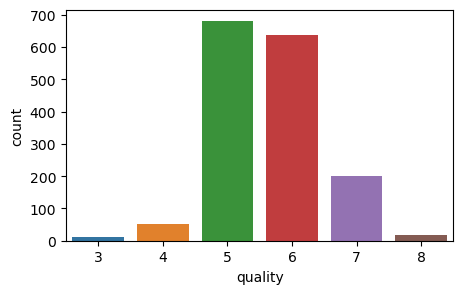

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(df['quality'])

In [11]:
def feature_encoder(df, col):
    temp_list = sorted(df['quality'].unique())
    return dict(zip(temp_list, range(len(temp_list)))) 

In [12]:
output_encoder = feature_encoder(df, 'quality')
output_encoder

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [13]:
df['quality'] = df['quality'].map(output_encoder)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


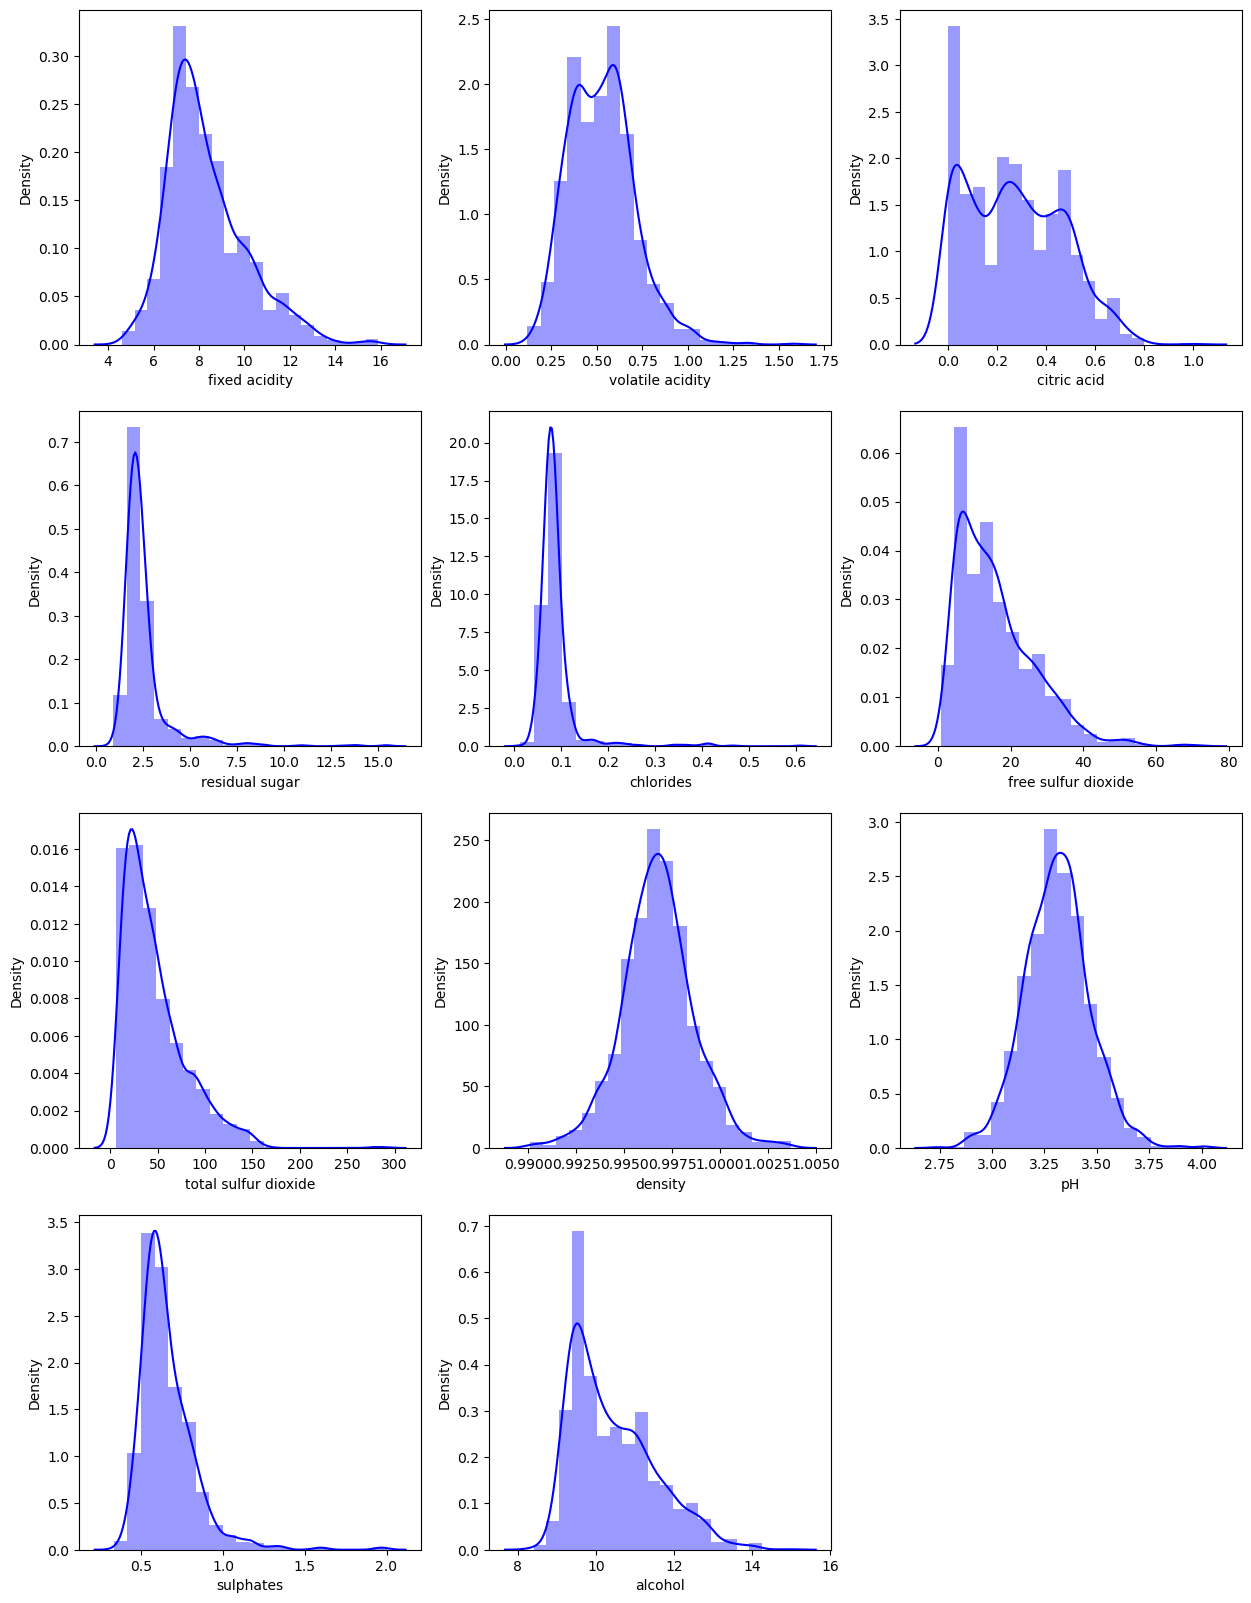

In [15]:
plt.figure(figsize=(15,20))
for enum, feature in enumerate(df.columns):
    if feature != 'quality':        
        plt.subplot(4,3, enum+1)
        sns.distplot(df[feature], color='b', bins =20)
        plt.xlabel(feature)
        plt.show

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Observations: 
* Residual sugar is right skewed and has outliers
* Free sulfur dioxide is right skewed and has outliers
* total sulfur dioxide is right skewed and has outliers
* density and pH are normally distributed


In [17]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
y.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

### Let's first try with classifiers with their default parameters

In [20]:
metrics = pd.DataFrame(index=['Train_score', 'Test_score','CV_score', 'accuracy', 
                              'precision', 'recall', 'f1_Score', 'roc_auc', 'log_loss'],
                       columns=['LR', 'DT', 'RF',
                                'LR_balanced', 'DT_balanced', 'RF_balanced',
                                'LR_SMOTE', 'DT_SMOTE', 'RF_SMOTE'])
metrics

,LR,DT,RF,LR_balanced,DT_balanced,RF_balanced,LR_SMOTE,DT_SMOTE,RF_SMOTE
Train_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Test_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CV_score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f1_Score,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
roc_auc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
log_loss,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
models = []

models.append(('LR',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models

[('LR', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('RF', RandomForestClassifier())]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
X.shape, y.shape

((1599, 11), (1599,))

In [24]:
y.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [25]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
def evalutate_model(model_list):
    
    for name, model in models:
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_score = f1_score(y_train, y_train_pred, average="weighted")
        metrics.loc['Train_score', name] = round(train_score*100,2)

        test_score = f1_score(y_test, y_test_pred, average="weighted")
        metrics.loc['Test_score', name] = round(test_score*100,2)

        cv_result = cross_val_score(model, X_train, y_train, cv = 3, scoring ='f1_weighted')
        print(f"{name:{13}} {cv_result} {cv_result.mean():{18}} {cv_result.std():{18}}")
        metrics.loc['CV_score', name] = round(cv_result.mean()*100,2)
        
        accuracy = accuracy_score(y_test, y_test_pred)
        metrics.loc['accuracy', name] = round(accuracy*100,2)

        precision = precision_score(y_test, y_test_pred, average="weighted")
        metrics.loc['precision', name] = round(precision*100,2)

        recall = recall_score(y_test, y_test_pred, average="weighted")
        metrics.loc['recall', name] = round(recall*100,2)

        f1_Score = f1_score(y_test, y_test_pred, average="weighted")
        metrics.loc['f1_Score', name] = round(f1_Score*100,2)


        # Probablities based scores
        y_preb_probs = model.predict_proba(X_test)

        roc_auc = roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")
        metrics.loc['roc_auc', name] = round(roc_auc*100,2)

        logloss = log_loss(y_test, y_preb_probs)
        metrics.loc['log_loss', name] = logloss

    return metrics

In [27]:
evalutate_model(model_list = "models")

LR            [0.5631693  0.54264035 0.61322337] 0.5730110070344558 0.02964383247645535
DT            [0.55715851 0.55723397 0.58999841]  0.568130297151557 0.01546312501301055
RF            [0.62549721 0.61285273 0.66948086] 0.6359436011662888 0.024269756857880607


,LR,DT,RF,LR_balanced,DT_balanced,RF_balanced,LR_SMOTE,DT_SMOTE,RF_SMOTE
Train_score,59.77,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
Test_score,54.67,57.62,65.67,NaN,NaN,NaN,NaN,NaN,NaN
CV_score,57.3,56.81,63.59,NaN,NaN,NaN,NaN,NaN,NaN
accuracy,57.19,58.13,67.5,NaN,NaN,NaN,NaN,NaN,NaN
precision,55.66,57.2,64.32,NaN,NaN,NaN,NaN,NaN,NaN
recall,57.19,58.13,67.5,NaN,NaN,NaN,NaN,NaN,NaN
f1_Score,54.67,57.62,65.67,NaN,NaN,NaN,NaN,NaN,NaN
roc_auc,75.5,67.15,85.14,NaN,NaN,NaN,NaN,NaN,NaN
log_loss,0.929404,14.463113,0.958124,NaN,NaN,NaN,NaN,NaN,NaN


### By using class_weight='balanced' parameter

In [28]:
models = []

models.append(('LR_balanced', LogisticRegression(class_weight='balanced')))
models.append(('DT_balanced', DecisionTreeClassifier(class_weight='balanced')))
models.append(('RF_balanced', RandomForestClassifier(class_weight='balanced')))
models

[('LR_balanced', LogisticRegression(class_weight='balanced')),
 ('DT_balanced', DecisionTreeClassifier(class_weight='balanced')),
 ('RF_balanced', RandomForestClassifier(class_weight='balanced'))]

In [29]:
evalutate_model(model_list = "models")

LR_balanced   [0.43285275 0.41801443 0.47404921]  0.441638795209738 0.023704711402410466
DT_balanced   [0.52825025 0.59509655 0.56031738] 0.5612213945882027 0.027297370742198644
RF_balanced   [0.61197925 0.60883756 0.67266652] 0.6311611100960683 0.029376772376204115


,LR,DT,RF,LR_balanced,DT_balanced,RF_balanced,LR_SMOTE,DT_SMOTE,RF_SMOTE
Train_score,59.77,100.0,100.0,47.25,100.0,100.0,NaN,NaN,NaN
Test_score,54.67,57.62,65.67,48.74,60.19,65.57,NaN,NaN,NaN
CV_score,57.3,56.81,63.59,44.16,56.12,63.12,NaN,NaN,NaN
accuracy,57.19,58.13,67.5,43.75,59.69,67.5,NaN,NaN,NaN
precision,55.66,57.2,64.32,60.71,61.16,64.26,NaN,NaN,NaN
recall,57.19,58.13,67.5,43.75,59.69,67.5,NaN,NaN,NaN
f1_Score,54.67,57.62,65.67,48.74,60.19,65.57,NaN,NaN,NaN
roc_auc,75.5,67.15,85.14,73.33,69.42,85.78,NaN,NaN,NaN
log_loss,0.929404,14.463113,0.958124,1.338608,13.923444,0.857629,NaN,NaN,NaN


### By using SMOTE

In [30]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smote = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))

x_smote, y_smote = smote.fit_resample(X,y)

In [31]:
x_smote.shape, y_smote.shape

((4078, 11), (4078,))

In [32]:
y_smote.value_counts()

2    681
3    681
4    681
1    681
5    681
0    673
Name: quality, dtype: int64

In [33]:
# <img src="SMOTE.PNG">

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_smote,y_smote, test_size=.2, random_state=42)

In [35]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
models = []

models.append(('LR_SMOTE',LogisticRegression()))
models.append(('DT_SMOTE',DecisionTreeClassifier()))
models.append(('RF_SMOTE',RandomForestClassifier()))
models

[('LR_SMOTE', LogisticRegression()),
 ('DT_SMOTE', DecisionTreeClassifier()),
 ('RF_SMOTE', RandomForestClassifier())]

In [37]:
evalutate_model(model_list = "models")

LR_SMOTE      [0.57210337 0.57696509 0.58198508] 0.5770178470462631 0.00403436479918032
DT_SMOTE      [0.76693767 0.77533312 0.75074497] 0.7643385878423329 0.010204927585432165
RF_SMOTE      [0.81970562 0.83803898 0.84165438] 0.8331329931913994 0.009608629195457201


,LR,DT,RF,LR_balanced,DT_balanced,RF_balanced,LR_SMOTE,DT_SMOTE,RF_SMOTE
Train_score,59.77,100.0,100.0,47.25,100.0,100.0,58.99,100.0,100.0
Test_score,54.67,57.62,65.67,48.74,60.19,65.57,58.98,79.27,85.3
CV_score,57.3,56.81,63.59,44.16,56.12,63.12,57.7,76.43,83.31
accuracy,57.19,58.13,67.5,43.75,59.69,67.5,60.17,79.66,85.78
precision,55.66,57.2,64.32,60.71,61.16,64.26,58.66,79.06,85.2
recall,57.19,58.13,67.5,43.75,59.69,67.5,60.17,79.66,85.78
f1_Score,54.67,57.62,65.67,48.74,60.19,65.57,58.98,79.27,85.3
roc_auc,75.5,67.15,85.14,73.33,69.42,85.78,87.93,87.7,97.75
log_loss,0.929404,14.463113,0.958124,1.338608,13.923444,0.857629,0.988755,7.026271,0.420706


# Fine Tunning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
tuned_metrics = pd.DataFrame(index=['Accuracy', 'precision', 'recall', 'f1_score', 'roc_auc', 'log_loss'],
                               columns=['LogisticReg_tuned', 'DecisionTree_tuned', 'RandomForest_tuned'])
                            
tuned_metrics

,LogisticReg_tuned,DecisionTree_tuned,RandomForest_tuned
Accuracy,NaN,NaN,NaN
precision,NaN,NaN,NaN
recall,NaN,NaN,NaN
f1_score,NaN,NaN,NaN
roc_auc,NaN,NaN,NaN
log_loss,NaN,NaN,NaN


In [40]:
# Logistic Regression:

param_grid = {'solver' : ['liblinear', 'saga',], 
              'penalty': ['l1', 'l2', 'elasticnet'], 
              'C': np.arange(.1,1, 0.1),
              'multi_class':["ovr"],
              'n_jobs': [-1]
             }

lr_model = GridSearchCV(LogisticRegression(), param_grid, cv =5, scoring='f1_weighted')
lr_model.fit(X_train,y_train)
lr_model.best_params_


{'C': 0.9,
 'multi_class': 'ovr',
 'n_jobs': -1,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [41]:
best_params = lr_model.best_params_
best_params

{'C': 0.9,
 'multi_class': 'ovr',
 'n_jobs': -1,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [42]:
"""
{'C': 0.9,
 'multi_class': 'ovr',
 'n_jobs': -1,
 'penalty': 'l1',
 'solver': 'liblinear'}
"""

"\n{'C': 0.9,\n 'multi_class': 'ovr',\n 'n_jobs': -1,\n 'penalty': 'l1',\n 'solver': 'liblinear'}\n"

In [43]:
lr_model = LogisticRegression(**best_params)
lr_model.fit(X_train,y_train)
y_pred_lr = lr_model.predict(X_test)

f1_score(y_pred_lr,y_test, average= 'weighted')

0.6130626828412671

In [44]:
def get_performance(model, model_name, y_test, y_pred):
    
    tuned_metrics.loc['Accuracy' , model_name]   = accuracy_score(y_pred,y_test)
    tuned_metrics.loc['f1_score' , model_name]   = f1_score(y_pred,y_test, average= 'weighted')
    tuned_metrics.loc['precision' , model_name]  = precision_score(y_pred,y_test, average= 'weighted')
    tuned_metrics.loc['recall' , model_name]     = recall_score(y_pred,y_test,average= 'weighted')

    y_preb_probs = model.predict_proba(X_test)

    roc_auc = roc_auc_score(y_test, y_preb_probs, average="weighted", multi_class="ovr")
    tuned_metrics.loc['roc_auc', model_name] = roc_auc

    logloss = log_loss(y_test, y_preb_probs)
    tuned_metrics.loc['log_loss', model_name] = logloss

    return tuned_metrics

In [45]:
get_performance(model = lr_model, model_name = 'LogisticReg_tuned', y_test=y_test, y_pred= y_pred_lr)

,LogisticReg_tuned,DecisionTree_tuned,RandomForest_tuned
Accuracy,0.589461,NaN,NaN
precision,0.656494,NaN,NaN
recall,0.589461,NaN,NaN
f1_score,0.613063,NaN,NaN
roc_auc,0.868642,NaN,NaN
log_loss,1.080386,NaN,NaN


In [46]:
# Decision Tree
param_grid = {'criterion' : ['gini', 'entropy'],
        'max_depth' : [5,7,9],
        'min_samples_leaf': [2,3,4,5,6],
        'min_samples_split': [1,2,3,4],
        'random_state': [42]
        }


dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv =5, scoring='f1_weighted')
dt_model.fit(X_train,y_train)
dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

In [47]:
best_params = dt_model.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}

In [48]:
"""
{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 42}
"""

"\n{'criterion': 'entropy',\n 'max_depth': 9,\n 'max_features': 9,\n 'min_samples_leaf': 1,\n 'random_state': 42}\n"

In [49]:
dt_model = DecisionTreeClassifier(**best_params)
dt_model.fit(X_train,y_train)
y_pred_dt = dt_model.predict(X_test)

f1_score(y_pred_dt,y_test, average= 'weighted')

0.7497089054107066

In [50]:
get_performance(model = dt_model, model_name = 'DecisionTree_tuned', y_test=y_test, y_pred= y_pred_dt)

,LogisticReg_tuned,DecisionTree_tuned,RandomForest_tuned
Accuracy,0.589461,0.73652,NaN
precision,0.656494,0.776399,NaN
recall,0.589461,0.73652,NaN
f1_score,0.613063,0.749709,NaN
roc_auc,0.868642,0.891443,NaN
log_loss,1.080386,4.159494,NaN


In [51]:
# Random Forest

param_grid = {'criterion' : ['gini', 'entropy'],
        'n_estimators' : [10,100,200],
        'max_depth' : [5,7,9],
        'min_samples_leaf': [2,3,4,5],
        'min_samples_split': [2,3,4],
        'oob_score' : [True,False],
        'n_jobs': [-1],
        'random_state': [42]
        }

rf_model = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1_weighted')
rf_model.fit(X_train,y_train)
rf_model.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42}

In [52]:
"""
{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42}
"""

"\n{'criterion': 'entropy',\n 'max_depth': 9,\n 'min_samples_leaf': 2,\n 'min_samples_split': 2,\n 'n_estimators': 200,\n 'n_jobs': -1,\n 'oob_score': True,\n 'random_state': 42}\n"

In [53]:
best_params = rf_model.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42}

In [54]:
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

f1_score(y_pred_rf,y_test, average= 'weighted')

0.8402766257823328

In [55]:
get_performance(model = rf_model, model_name = 'RandomForest_tuned', y_test=y_test, y_pred= y_pred_rf)

,LogisticReg_tuned,DecisionTree_tuned,RandomForest_tuned
Accuracy,0.589461,0.73652,0.832108
precision,0.656494,0.776399,0.855489
recall,0.589461,0.73652,0.832108
f1_score,0.613063,0.749709,0.840277
roc_auc,0.868642,0.891443,0.964822
log_loss,1.080386,4.159494,0.56434


* f1_score of RandomForest is maximum moreover both precision and recall are also high.

In [56]:
# Saving the model and transformer objects

pickle.dump(output_encoder, open(os.path.join(os.getcwd(), 'output_encoder.pkl'),'wb'))
pickle.dump(scaler, open(os.path.join(os.getcwd(), 'Red_Wine_Quality_scaler.pkl'),'wb'))
pickle.dump(rf_model, open(os.path.join(os.getcwd(), 'Red_Wine_Quality_model.pkl'),'wb'))